# Driving in Circles

AutomotiveDrivingModels is templated to efficiently run different types of simulations.
Entities are parameterized by their:

- *S* state, which changes over time
- *D* defintion, which does not change over time
- *I* id, typically an `Int`, which uniquely identifies that entity.

In addition to these types, the actions, environment and the driver models can also be parameterized.

This notebook demonstrates a 2D driving simulation where cars drive in a multi-lane stadium.
The types are:

- *S* - `VehicleState`, containing both the global and lane-relative position, and speed
- *D* - `VehicleDef`, containing length, width, and class
- *I* - `Int`

We use a `Roadway` as our environment. The `Roadway` type is based on the RNDF format.

In [1]:
using AutomotiveDrivingModels
using AutoViz
using Distributions

┌ Info: Precompiling AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
└ @ Base loading.jl:1186
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba]
│   exception = ArgumentError("Invalid header in cache file C:\\Users\\Maxime\\.julia\\compiled\\v1.1\\AutomotiveDrivingModels\\ZEfHM.ji.")
└ @ Base loading.jl:969
┌ Info: Precompiling AutoViz [82aa6e0c-a491-5edf-8d4b-c16b98e4ea17]
└ @ Base loading.jl:1186
┌ Warning: Module AutomotiveDrivingModels with build ID 614702750231424 is missing from the cache.
│ This may mean AutomotiveDrivingModels [99497e54-f3d6-53d3-a3a9-fa9315a7f1ba] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:947
┌ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
└ @ Base loading.jl:1186


We generate a 3-lane stadium roadway:

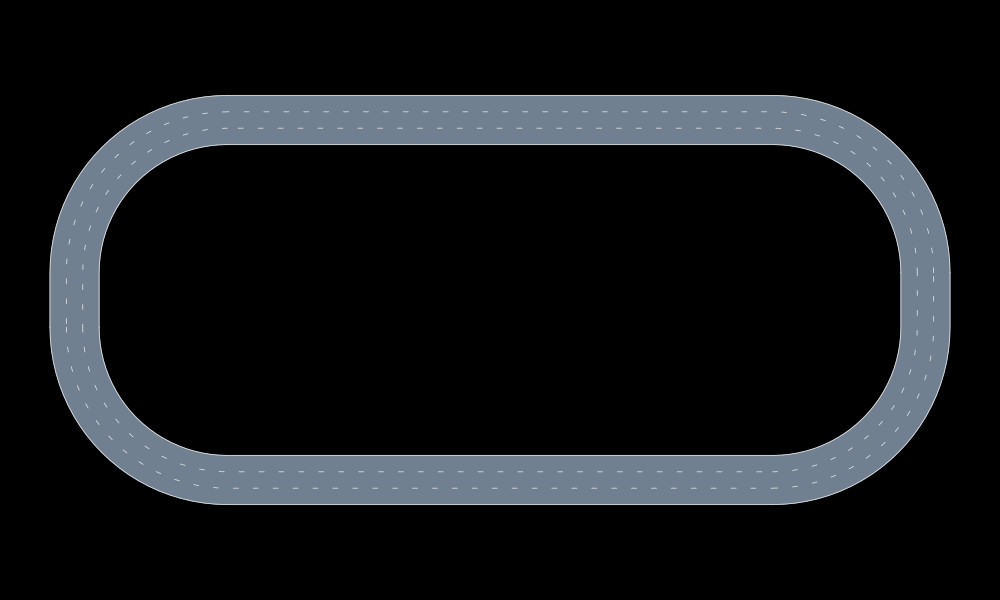

In [2]:
roadway = gen_stadium_roadway(3)

Let's populate a scene.

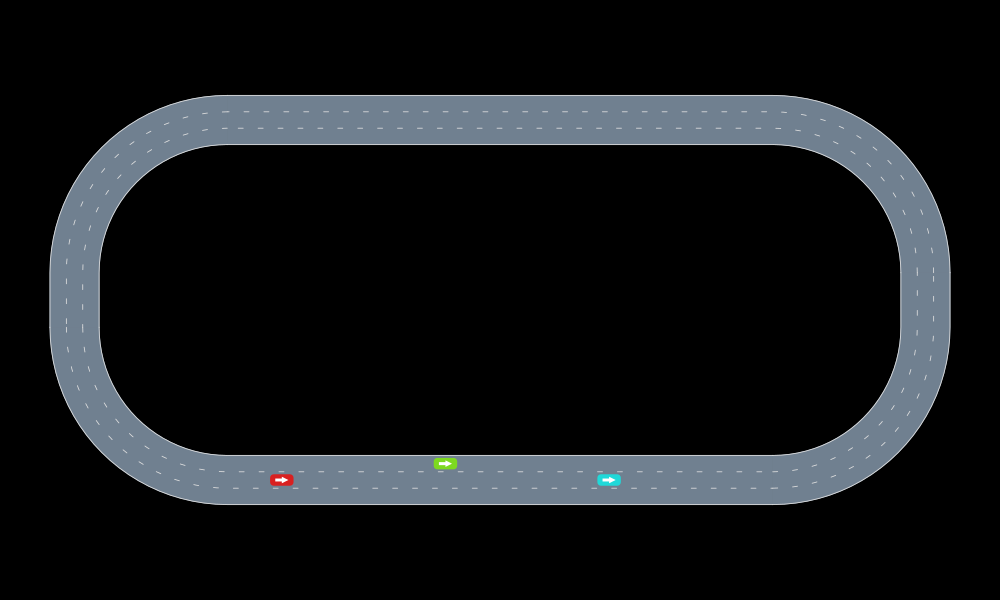

In [3]:
scene = Scene()
push!(scene,Vehicle(VehicleState(VecSE2(10.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 29.0), VehicleDef(), 1))
push!(scene,Vehicle(VehicleState(VecSE2(40.0,0.0,0.0), roadway, 22.0), VehicleDef(), 2))
push!(scene,Vehicle(VehicleState(VecSE2(70.0,-DEFAULT_LANE_WIDTH,0.0), roadway, 27.0), VehicleDef(), 3))

car_colors = get_pastel_car_colors(scene)
cam = FitToContentCamera()
render(scene, roadway, cam=cam, car_colors=car_colors)

Let's assign driver models.

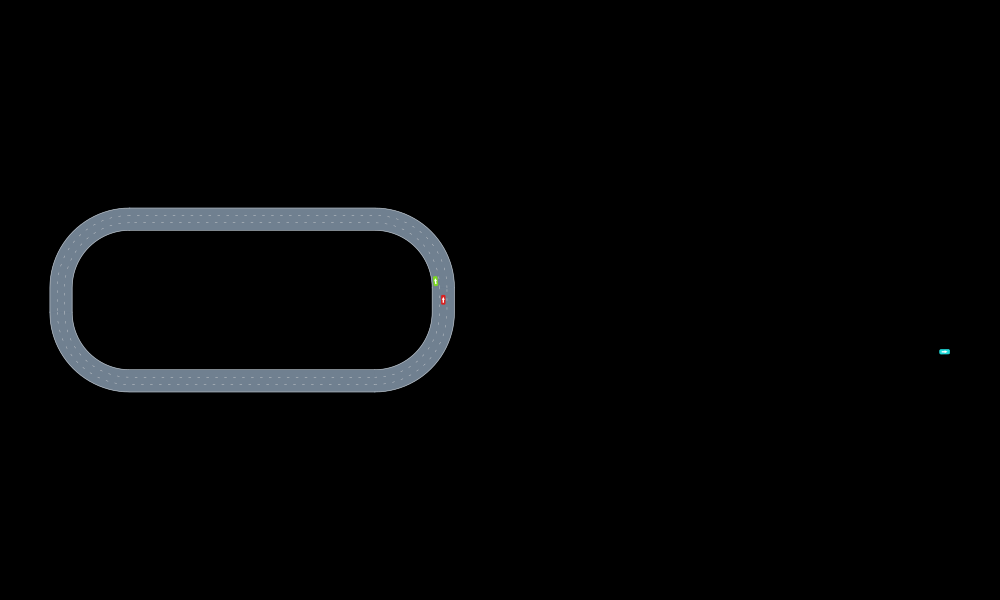

In [4]:
timestep = 0.1

models = Dict{Int, DriverModel}()
models[1] = LatLonSeparableDriver( # produces LatLonAccels
        ProportionalLaneTracker(), # lateral model
        IntelligentDriverModel(), # longitudinal model
)
models[2] = Tim2DDriver(timestep,
        mlane = MOBIL(timestep),
    )
models[3] = StaticDriver{AccelTurnrate, MvNormal}(MvNormal([0.0,0.0], [1.0,0.1]))

set_desired_speed!(models[1], 12.0)
set_desired_speed!(models[2], 10.0)
set_desired_speed!(models[3],  8.0)

nticks = 100
rec = SceneRecord(nticks+1, timestep)
simulate!(rec, scene, roadway, models, nticks)
render(rec[0], roadway, cam=cam, car_colors=car_colors)

We can use interact to inspect the simulation record. Note that the static driver just drives off the road.

┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1186
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for InteractBase [d3863d7c-f0c8-5437-a7b4-3ae773c01009]
│   exception = Required dependency Knockout [bcebb21b-c2e3-54f8-a781-646b90f6d2cc] failed to load from a cache file.
└ @ Base loading.jl:969


HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/468e3c5cbff4bba2f7f3ca28e0afa7cac8df1be0-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["frame_index"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"value: indexString, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"indexString"=>(Observable{String} with 1 listeners. Value:
"51", nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Maxime\\.julia\\packages\\Knockout\\JE2Yq\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\all.js", "C:\\Users\\Maxime\\.julia\\packages\\InteractBase\\jyXKw\\src\\..\\assets\\style.css", "C:\\Users\\Maxime\\.julia\\packages\\Interact\\Fs3lV\\src\\..\\assets\\bulma_confined.min.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73\",\"74\",\"75\",\"76\",\"77\",\"78\",\"79\",\"80\",\"81\",\"82\",\"83\",\"84\",\"85\",\"86\",\"87\",\"88\",\"89\",\"90\",\"91\",\"92\",\"93\",\"94\",\"95\",\"96\",\"97\",\"98\",\"99\",\"100\",\"101\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"indexString\":WebIO.getval({\"name\":\"indexString\",\"scope\":\"knockout-component-3a4089d5-9c0b-4915-ad77-f71390a7746e\",\"id\":
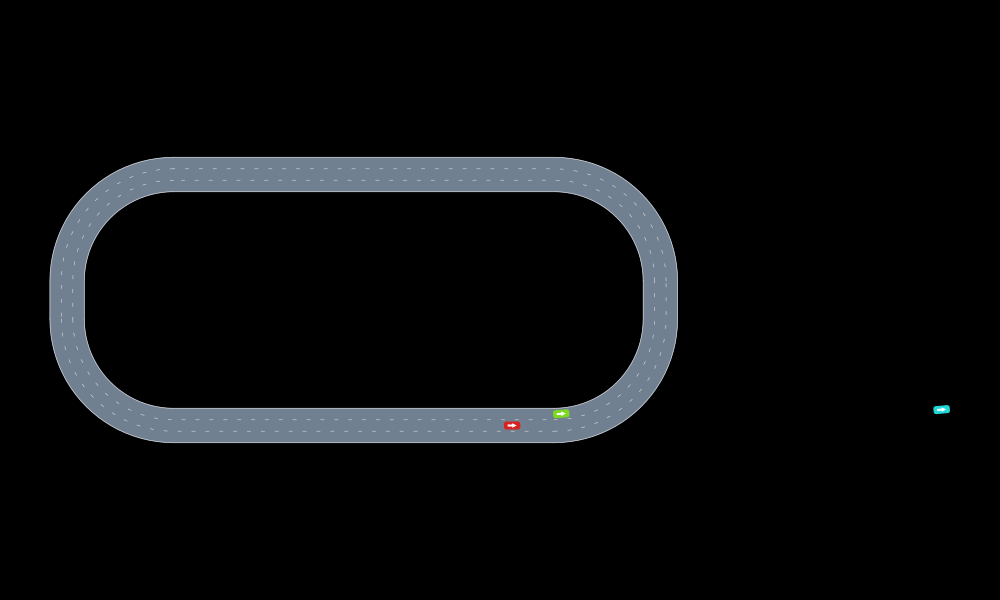
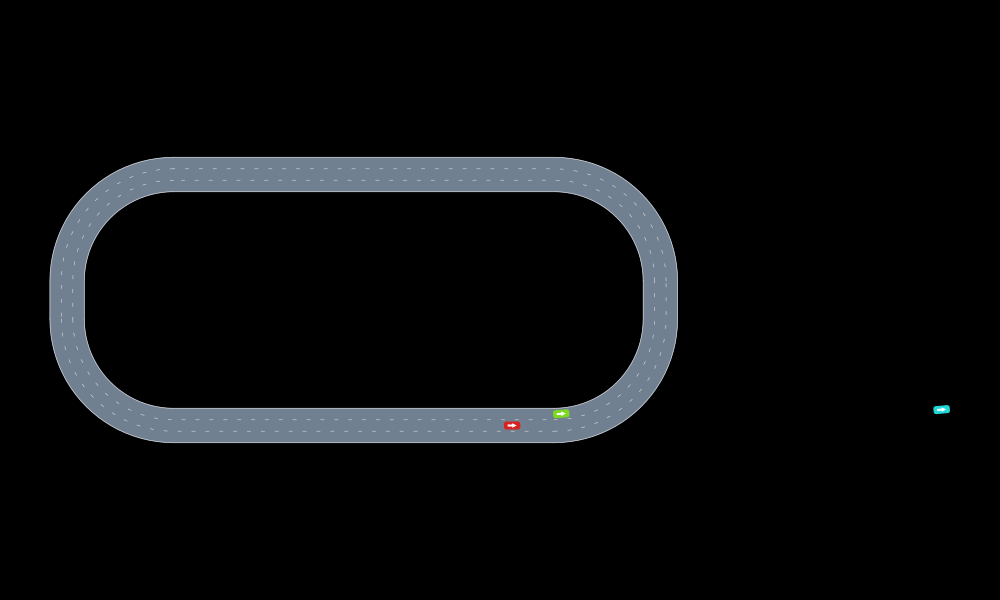

In [5]:
using Interact
@manipulate for frame_index in 1 : nframes(rec)
    render(rec[frame_index-nframes(rec)], roadway, cam=cam, car_colors=car_colors)
end

We can save the run to a text file. We achieve this by first converting the the `Trajdata` type and then exporting that.

In [6]:
listrec = convert(Trajdata, rec)
open("2Dstadium_listrec.txt", "w") do io
    write(io, MIME"text/plain"(), listrec)
end

The file can be loaded in a similar way.

In [7]:
listrec2 = open("2Dstadium_listrec.txt", "r") do io
    read(io, MIME"text/plain"(), Trajdata)
end

Trajdata(101 frames)